<a href="https://colab.research.google.com/github/valdolab/DS_mAIstros/blob/main/Week4/Note_neural_nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks 

---



The neuron: many inputs, one output



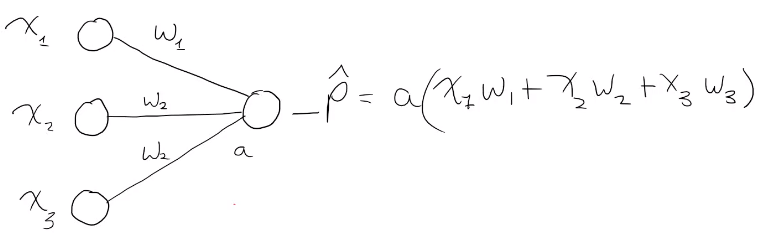

A neural net's job is to learn


For supervised learning:


*   Labels -> y
*   Data -> X

Model is a function that approximents the behaviour of the studied phenomena \\
**Un aproximador de funciones, A function approximator**



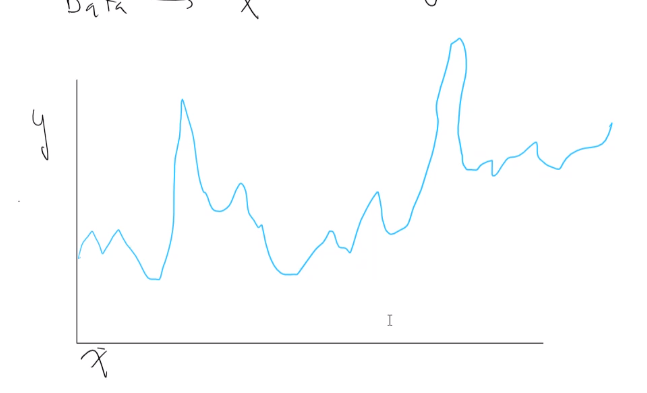



1. Import data
2. Initialize weights (randomly)
3. Establish loss
4. Establish weight update rules
5. Otimize -> GD (gradient descent) iterate and modify weights and minimize loss 





## Simple logistic regression

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#ff0000","#0000ff"])
cmap_light = ListedColormap(["#ffbbbb","#bbbbff"])

In [4]:
def sigmoid(h):
  return 1/(1+np.exp(-h))

def binary_cross_entropy(y,p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [5]:
class SLogisticRegression():
  
  def __init__(self, thresh=0.5):
    self.thresh = thresh
    self.b = None
    self.w = None
  
  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape
    #initialize the weights and biases
    self.w = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)
    #SDG Optimization
    for epoch in range(epochs):
      p_hat = self.__forward__(X)
      J[epoch] = binary_cross_entropy(y,p_hat)
      #weights and biases update rules
      self.w -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y)

    if(show_curve):
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self, X):
    return sigmoid(X@self.w + self.b)

  def predict(self,X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)


In [6]:
#how to create list of numbers fast, USEFUL TO CODING
[1]*5+[2]*3

[1, 1, 1, 1, 1, 2, 2, 2]

In [7]:
def main():
  N=1000
  D=2

  X0 = np.random.randn((N//2),D) + np.array([1,1])
  X1 = np.random.randn((N//2),D) + np.array([-1,-1])
  X = np.vstack((X0,X1))

  y = np.array([0]*(N//2)+[1]*(N//2))

  plt.figure()
  plt.scatter(X[:,0], X[:,1],c=y, s=5, alpha=0.5)
  plt.show()

  log_reg = SLogisticRegression()
  log_reg.fit(X,y,epochs=1e4,eta=1e-2,show_curve=True)
  y_hat = log_reg.predict(X)
  print(f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

  #new word: slope = pendiente
  x1 = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 1000)
  x2 = -(log_reg.b/log_reg.w[1]) - (log_reg.w[0]/log_reg.w[1])*x1

  plt.figure()
  plt.scatter(X[:,0],X[:,1],c=y_hat,alpha=0.5)
  #scatter makes points, and plot makes a line between point to point
  plt.plot(x1,x2,color="#000000",linewidth=2)
  plt.show()

  xx1, xx2 = np.meshgrid(x1, x2)
  Z = log_reg.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

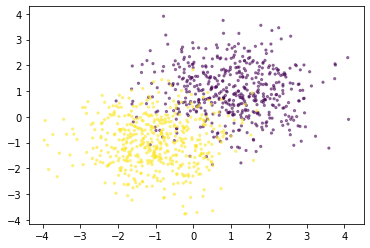

Training Accuracy: 0.9070


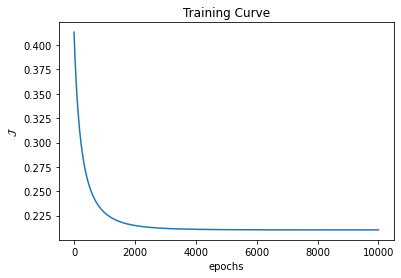

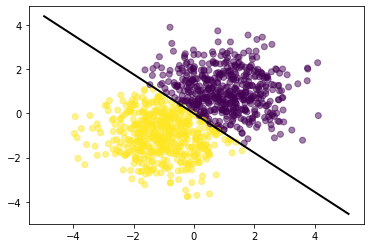

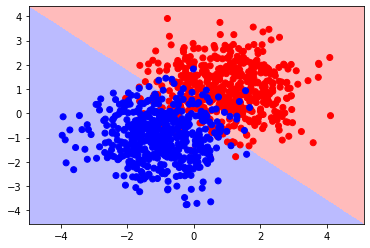

In [29]:
if __name__ =="__main__":
  main()

## Multiclass problem

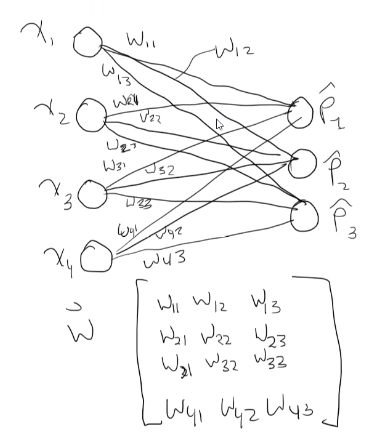

How does it work the neurons net, just multiply and sums the weights and X values:

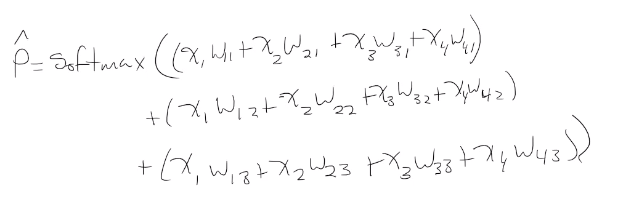

**outputs:** as many neurons as the dataset have, in this example, the dataset has 3 clases, so, the output of the nets should has 3 neurons. (This help the probability of classify the clases) \\

**Inputs:** as many features as the dataset have.

## Multi - variate Logistic Regression

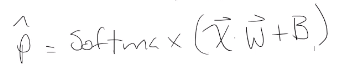

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T

def cross_entropy(Y,P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def indices_to_one_hot(data, nb_classes):
  targets = np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [10]:
class MVLogisticRegression():

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N,D = X.shape

    K = len(np.unique(y))
    y_values = np.unique(y, return_index = False)
    Y = indices_to_one_hot(y,K).astype(int)
    #initialize W,B
    self.B = np.random.randn(N,K)
    self.W = np.random.randn(D,K)

    J = np.zeros(epochs)
    for epoch in range(epochs):
      P_hat = self.__forward__(X)
      J[epoch] = cross_entropy(Y, P_hat)
      # weights and bias update rules
      self.W -= eta*(1/N)*X.T@(P_hat-Y)
      self.B -= eta*(1/N)*np.sum(P_hat-Y,axis=0)

    if(show_curve):
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return softmax(X@self.W + self.B)

  def predict(self, X):
    return np.argmax(self.__forward__(X), axis=1)


MULTI LAYER PERCEPTRON MLP

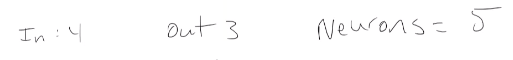

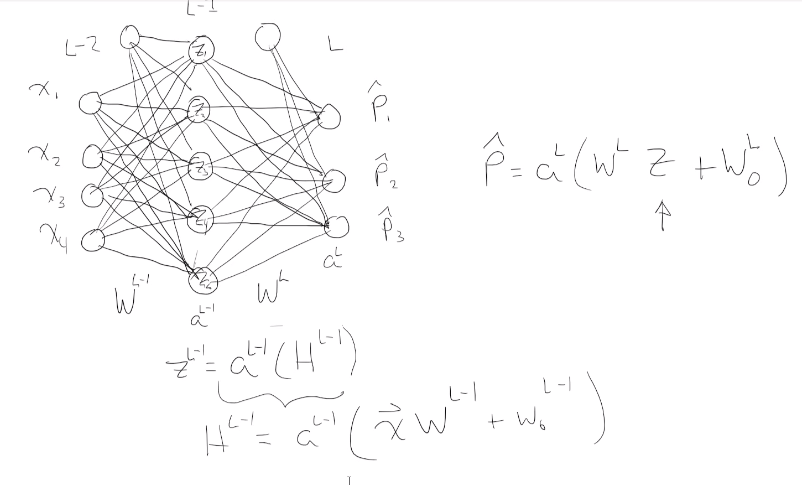

customer churn = rotación de clientes, perdida de clientes

In [11]:
data = pd.read_csv("/content/drive/MyDrive/Classroom/DS mAIstros/datasets/TripGaussKNN.csv")
data

,Unnamed: 0,0,1,2
0,0,2.769395,0.762216,0
1,1,1.519271,1.487948,0
2,2,2.407084,2.836605,0
3,3,1.276534,1.396749,0
4,4,0.380165,4.396517,0
...,...,...,...,...
2995,2995,-3.537007,3.431588,2
2996,2996,-1.709969,2.675040,2
2997,2997,-2.098664,2.084230,2
2998,2998,-1.523310,1.083698,2


In [12]:
y = data['2'].to_numpy()
X = data[['0','1']].to_numpy()

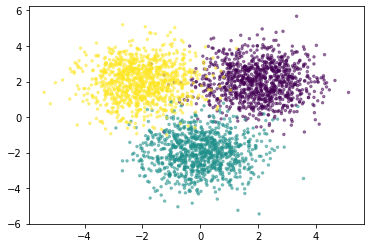

In [13]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y, alpha=0.5, s=6)

In [14]:
multlogreg = MVLogisticRegression()

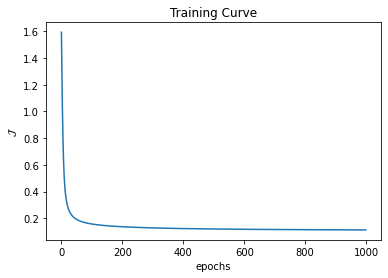

In [21]:
multlogreg.fit(X,y,eta=1e-1,epochs=1e3,show_curve=True)

In [24]:
y_hat = multlogreg.predict(X)
accuracy(y,y_hat)

0.9613333333333334

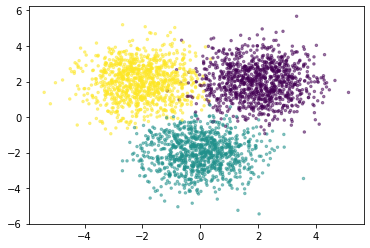

In [25]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y_hat, alpha=0.5, s=6)

## MVLogistic regression 
Shallow neuron net \\
The output of the first net conect as a input to the secound net, join the nets, and the secound net (to the right), make the prediction

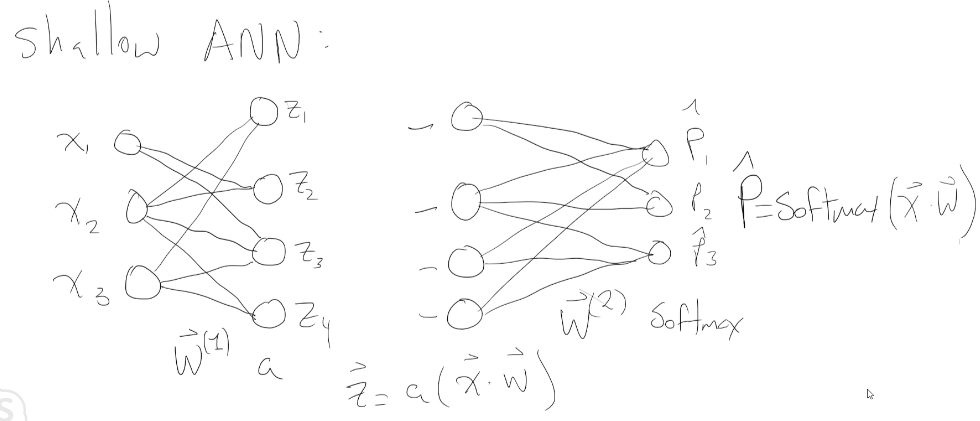

something like this:

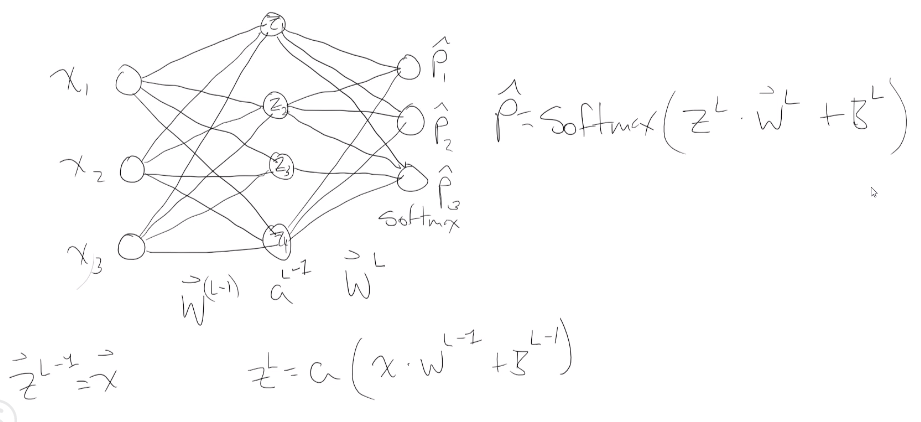

## Shalow ANN or Multi-layer perceptron

In [26]:
import numpy as pn
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#ff0000","#00ff00","#0000ff"])
cmap_light = ListedColormap(["#ffbbbb","#bbffbb","#bbbbff"])

In [43]:
def linear(H):
  return H

#most activation functions used: relu, sigmoid, tanh
#which activiation functions need to multiclass problem?: ???
def ReLU(H):
  return H*(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH = np.exp(H)
  return eH/eH.sum(axis=1,keepdims=True)

def one_hot_encode(y):
  N = len(y)
  K = len(set(y))
  Y = np.zeros((N, K))

  for i in range(N):
    Y[i,y[i]] = 1
  
  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def cross_entropy(y,P_hat):
  return -np.sum(y*np.log(P_hat))

In [44]:
#just to undertand zip, solo para enternder la funcion zip
tuple(zip([1,2],[3,4]))

((1, 3), (2, 4))

In [45]:
class Shallow_ANN():
  def fit(self,X,y,neurons=10,eta=1e-3,epochs=1e3, show_curve=False):
    epochs = int(epochs)
    Y = one_hot_encode(y)
    N,D = X.shape
    K = Y.shape[1]
    #weights and bias initialization
    self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
    self.B = {l: np.random.rand(M) for l,M in enumerate([neurons,K],1)}
    #define activation
    #for layer 1 activation is tanh, and for layer 2 activation is softmax
    self.a = {1:np.tanh, 2:softmax}

    J = np.zeros(epochs)
    #GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch] = cross_entropy(Y,self.Z[2])
      
      #weights and biases update rules
      #for layer 2 (output)
      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      #For layer 1
      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if(show_curve):
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    self.Z={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self,X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [48]:
def main():
  D = 2
  K = 3
  N= int(K*1e3)

  X0= np.random.randn((N//K),D) + np.array([2,2])
  X1= np.random.randn((N//K),D) + np.array([0,-2])
  X2= np.random.randn((N//K),D) + np.array([-2,2])
  X=np.vstack((X0,X1,X2))

  y=np.array([0]*(N//K)+ [1]*(N//K)+ [2]*(N//K))

  my_ann = Shallow_ANN()

  my_ann.fit(X,y, neurons=20, eta = 2e-1, epochs=2e2, show_curve=True)
  y_hat =my_ann.predict(X)

  print (f"Training Accuracy: {accuracy(y,y_hat):0.4f}")

  #print(my_ann.W)
  #print(my_ann.B)
  x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
  x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)
  
  xx1, xx2 = np.meshgrid(x1, x2)
  Z = my_ann.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
  
  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
  
  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

Training Accuracy: 0.9613


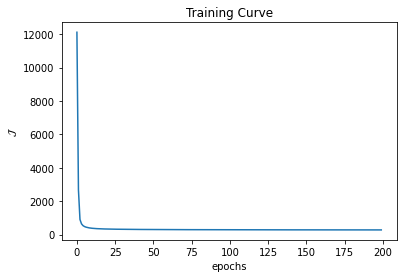

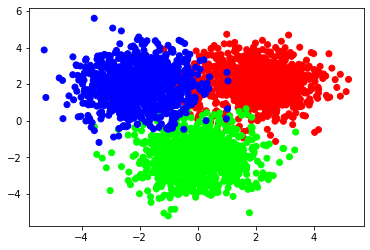

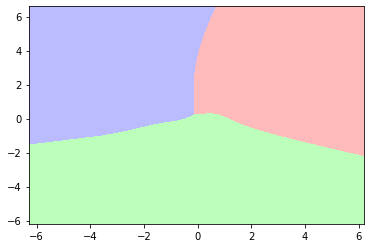

In [49]:
if __name__ == "__main__":
  main()